# pycisTopic analysis

Full dataset, using SCREEN regions.

In [36]:
import pycisTopic
pycisTopic.__version__

'1.0.2.dev0+g6236cef.d20220816'

In [37]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [38]:
import pickle
import pandas as pd

In [39]:
import glob
from collections import OrderedDict
import numpy as np

In [40]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_7_merged_equalcells_celltypefair


In [41]:
import os
wdir = '/lustre1/project/stg_00090/scatac_benchmark/fixedcells_7_merged_equalcells_celltypefair'
os.chdir( wdir )

In [42]:
n_topics_final = 30
base_topic = 10
topics_final = set(sorted([str(x+1) for x in list(range(base_topic,n_topics_final))]))
n_cores = 16
n_iter = "400"
print(sorted(topics_final))

['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


In [43]:
mounts = "/lustre1,/staging,/data,/vsc-hard-mounts,/scratch"
sif = "../0_resources/cistopic_image/20220815_pycistopic.sif"
script = "../0_resources/scripts/runModels_lda_mallet.py"

f_mod_dir = 'models__screen__mallet'
if not os.path.exists(os.path.join(wdir, f_mod_dir)):
    os.makedirs(os.path.join(wdir, f_mod_dir))

infile = 'cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.pkl'
sample = 'master_celltypefair_1.FIXEDCELLS'
outfile = sample + '__models_' + str(n_iter) + '_iter.pkl'




topics_todo = str(sorted(list(topics_final))).replace("'","").replace(' ','').replace('[','').replace(']','')
ver=str(n_topics_final)

if not topics_todo == '':
    for n_topics in topics_todo.split(','):
        intermediate_dir = f"{f_mod_dir}/model_intermediates/{sample + '_' + n_topics}_model_intermediates/"
        if not os.path.exists(os.path.join(wdir, intermediate_dir)):
            os.makedirs(os.path.join(wdir, intermediate_dir))

        model_tmp_dir = f"{f_mod_dir}/model_tmp/{sample + '_' + n_topics}_model_tmp/"
        if not os.path.exists(os.path.join(wdir, model_tmp_dir)):
            os.makedirs(os.path.join(wdir, model_tmp_dir))
            
        out_log = f"{f_mod_dir}/{sample}.models_out_log{n_topics}.txt"
        cmd = f"echo {sample} && cd {wdir} && singularity exec -B {mounts} {sif} python {script} -i {infile} -o {outfile} -nt {n_topics} -c {n_cores} -it {n_iter} -a 50 -abt True -e 0.1 -ebt False -sp {intermediate_dir} -s 555 -td {model_tmp_dir} > {out_log}"

        print(cmd)
        sh_path = f"{f_mod_dir}/{sample}.runmodels{n_topics}.sh"
        with open(sh_path, 'w') as file:
            file.write(cmd)
    else:
        print('All topics done.')


print('\n')

echo master_celltypefair_1.FIXEDCELLS && cd /lustre1/project/stg_00090/scatac_benchmark/fixedcells_7_merged_equalcells_celltypefair && singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch ../0_resources/cistopic_image/20220815_pycistopic.sif python ../0_resources/scripts/runModels_lda_mallet.py -i cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl -o master_celltypefair_1.FIXEDCELLS__models_400_iter.pkl -nt 11 -c 16 -it 400 -a 50 -abt True -e 0.1 -ebt False -sp models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_11_model_intermediates/ -s 555 -td models__screen__mallet/model_tmp/master_celltypefair_1.FIXEDCELLS_11_model_tmp/ > models__screen__mallet/master_celltypefair_1.FIXEDCELLS.models_out_log11.txt
echo master_celltypefair_1.FIXEDCELLS && cd /lustre1/project/stg_00090/scatac_benchmark/fixedcells_7_merged_equalcells_celltypefair && singularity exec -B /lustre1,/staging

In shell:

```
for script in models__screen__mallet/*.sh
do
    echo $script
    qsub $script -A lp_symbiosys -l nodes=1:ppn=36 -l walltime=24:00:00 -l pmem=2gb
done
```

In [44]:
ls models__screen__mallet/*.sh > models__screen__mallet/models.parallel
chmod 755 models__screen__mallet/*.sh
cat models__screen__mallet/models.parallel | parallel -j 5 --progress

SyntaxError: invalid syntax (2239788841.py, line 1)

Then, combine the models:

In [45]:
intermediate_dict = {x.split('/')[-1].split('_model_intermediates')[0]: x for x in sorted(glob.glob(f'{f_mod_dir}/model_intermediates/*/*'))}
intermediate_dict

{'Topic11.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_11_model_intermediates/Topic11.pkl',
 'Topic12.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_12_model_intermediates/Topic12.pkl',
 'Topic13.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_13_model_intermediates/Topic13.pkl',
 'Topic14.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_14_model_intermediates/Topic14.pkl',
 'Topic15.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_15_model_intermediates/Topic15.pkl',
 'Topic16.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_16_model_intermediates/Topic16.pkl',
 'Topic17.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCELLS_17_model_intermediates/Topic17.pkl',
 'Topic18.pkl': 'models__screen__mallet/model_intermediates/master_celltypefair_1.FIXEDCEL

In [46]:
file_list = sorted(glob.glob(f'{f_mod_dir}/model_intermediates/*/*'))
n_topics = [int(x.split('Topic')[-1].split('.pkl')[0].replace('Topic','')) for x in file_list]
file_list_sorted = [file_list[x] for x in np.argsort(n_topics)]

models_merged = [pickle.load(open(file, 'rb')) for file in file_list_sorted]

In [47]:
save_path = f"{f_mod_dir}/master_all_1.FIXEDCELLS__models_{n_iter}_iter.pkl"
with open(save_path, "wb") as f:
    pickle.dump(models_merged, f, protocol=4)

In [48]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [49]:
cto_path = 'cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.pkl'

We need to minimize Arun, minimize Cao & Juan, maximize Mimno & maximize log likelihood

In [50]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

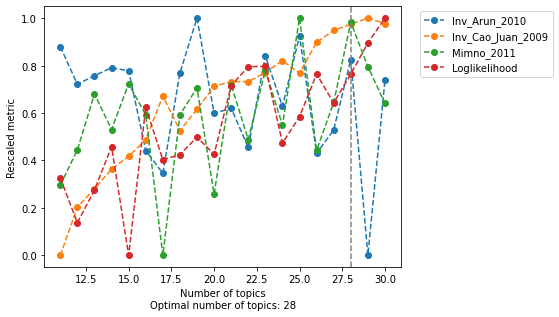

In [53]:
n_topics_chosen = 28
model = evaluate_models(models_merged,
     select_model=n_topics_chosen,
     return_model=True, 
     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
     plot=True, # disabled since we only test one model here
     plot_metrics=False,
     save=f"plots_qc/master_all_1.FIXEDCELLS__model_evaluation.png"
     )

In [61]:
model

In [60]:
infile = 'cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.pkl'

cto_path_new = "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.pkl".replace('.pkl',f'.model_{str(n_topics_chosen)}topics.pkl')
with open(infile, 'rb') as f:
    cto = pickle.load(f)

cto.add_LDA_model(model)

with open(cto_path_new, "wb") as f:
    pickle.dump(cto, f, protocol=4)